In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import font_manager

In [2]:
font_path = "C:/Windows/Fonts/Arial.ttf"
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 문제 해결


In [3]:
# Read raw data
conditions = []
with open('qt_conditions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        conditions.append(line)
    file.close()

species = []
with open('qt_species_list.txt','r') as file:
    i = 0
    for line in file:        
        line = line.strip()
        if i < 9:
            line = line[2:]
        else:
            line = line[3:]
        species.append(line)
        i += 1
    file.close()

reactions = []
with open('qt_reactions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        reactions.append(line)
    file.close()

df_cd = pd.read_csv('qt_conditions.txt', sep=r'\s+', header=0, names=['Time [s]']+conditions)
df_sp = pd.read_csv('qt_densities.txt', sep=r'\s+', header=0, names=['Time [s]']+species)
df_rx = pd.read_csv('qt_rates.txt', sep=r'\s+', header=0, names=['Time [s]']+reactions)

In [4]:
df_cd

,Time [s],Reduced field [Td],Gas temperature [K],Electron temperature [K],Current density [A/cm2],Power density [W/cm3]
0,0.0000,553.0,298.15,0.0,0.000000,0.00
1,0.0001,553.0,298.15,66073.0,0.002197,298.90
2,0.0002,553.0,298.15,66073.0,0.002197,298.90
3,0.0003,553.0,298.15,66073.0,0.002197,298.90
4,0.0004,553.0,298.15,66073.0,0.002197,298.90
...,...,...,...,...,...,...
1953,4.9115,553.0,298.15,73044.0,0.002645,391.85
1954,4.9319,553.0,298.15,73078.0,0.002647,392.25
1955,4.9520,553.0,298.15,73117.0,0.002650,392.79
1956,4.9736,553.0,298.15,73132.0,0.002649,392.72


In [5]:
df_CH4 = df_sp['CH4'] + df_sp['CH4(V13)'] + df_sp['CH4(V24)'] + df_sp['CH4^+']
df_C2H6 = df_sp['C2H6'] + df_sp['C2H6(V13)'] + df_sp['C2H6(V24)'] + df_sp['C2H6^+']
df_C2H4 = df_sp['C2H4'] + df_sp['C2H4(V1)'] + df_sp['C2H4(V2)'] + df_sp['C2H4^+']
df_CH3 = df_sp['CH3'] + df_sp['CH3^+']
df_C2H2 = df_sp['C2H2'] + df_sp['C2H2(V13)'] + df_sp['C2H2(V2)'] + df_sp['C2H2(V5)'] + df_sp['C2H2^+']
df_C3H8 = df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'] + df_sp['C3H8^+']
df_C3H6 = df_sp['C3H6'] + df_sp['C3H6(V)'] + df_sp['C3H6^+']
df_C4H9 = df_sp['C4H9']
df_H2 = df_sp['H2'] + df_sp['H2^+']
df_C5H12 = df_sp['C5H12']

In [6]:
M_CH4 = df_CH4 / const.N_A * 16
M_C2H6 = df_C2H6 / const.N_A * 30
M_C2H4 = df_C2H4 / const.N_A * 28
M_C2H2 = df_C2H2 / const.N_A * 26
M_C3H8 = df_C3H8 / const.N_A * 44
M_C3H6 = df_C3H6 / const.N_A * 42
M_C4H9 = df_C4H9 / const.N_A * 57
M_CH3 = df_CH3 / const.N_A * 15
M_H2 = df_H2 / const.N_A * 2
M_C5H12 = df_C5H12 / const.N_A * 72

In [7]:
Conv_CH4 = (M_CH4.iloc[0] - M_CH4) / M_CH4.iloc[0] * 100
Sel_C2H6 = M_C2H6 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C2H4 = M_C2H4 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C2H2 = M_C2H2 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C3H8 = M_C3H8 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C3H6 = M_C3H6 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C4H9 = M_C4H9 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_CH3 = M_CH3 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_H2 = M_H2 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C5H12 = M_C5H12 / (M_CH4.iloc[0] - M_CH4) * 100
Total = Sel_C2H6 + Sel_C2H4 + Sel_C2H2 + Sel_C3H8 + Sel_C3H6 + Sel_C4H9 + Sel_H2 + Sel_C5H12 

In [8]:
Sel_H2.iloc[-1] + Sel_CH3.iloc[-1] + Sel_C2H6.iloc[-1]

np.float64(69.02309436116327)

27.256504065017833


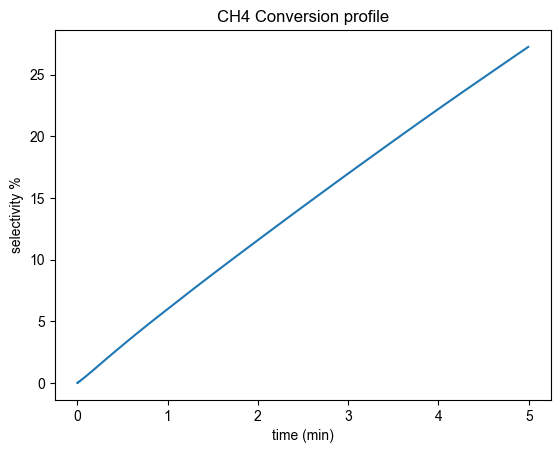

In [9]:
plt.plot(df_sp['Time [s]'], Conv_CH4)
plt.title('CH4 Conversion profile')
plt.ylabel('selectivity %')
plt.xlabel('time (min)')
print(Conv_CH4.iloc[-1])

In [10]:
a = -1
print(df_sp['Time [s]'].iloc[a])
print(Conv_CH4.iloc[a])
print(Sel_C2H6.iloc[a]/Total.iloc[a]*100)
print(Sel_C2H4.iloc[a]/Total.iloc[a]*100)
print(Sel_C2H2.iloc[a]/Total.iloc[a]*100)
print(Sel_C3H8.iloc[a]/Total.iloc[a]*100)
print(Sel_C3H6.iloc[a]/Total.iloc[a]*100)
print(Sel_C4H9.iloc[a]/Total.iloc[a]*100)
print(Sel_H2.iloc[a]/Total.iloc[a]*100)
print(Sel_C5H12.iloc[a]/Total.iloc[a]*100)

4.9944
27.256504065017833
32.15215482699343
1.1671430005481895
12.394302641553118
28.496513586345905
1.3433406021343049e-05
11.471547388147355
14.318325123005993
0.0


In [11]:

print(3/2*df_cd['Electron temperature [K]'].iloc[-1] / const.e * const.k)
print(df_cd['Current density [A/cm2]'].iloc[-1])

9.456790781877052
0.0026498


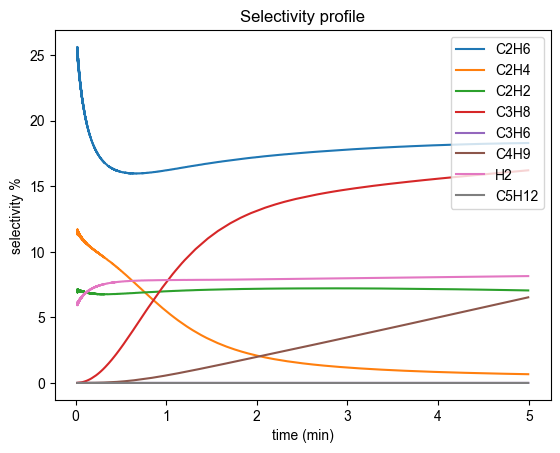

In [12]:
a = 200
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C2H6.iloc[a:], label='C2H6')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C2H4.iloc[a:], label='C2H4')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C2H2.iloc[a:], label='C2H2')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C3H8.iloc[a:], label='C3H8')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C3H6.iloc[a:], label='C3H6')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C4H9.iloc[a:], label='C4H9')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_H2.iloc[a:], label='H2')
plt.plot(df_sp['Time [s]'].iloc[a:], Sel_C5H12.iloc[a:], label='C5H12')
plt.title('Selectivity profile')
plt.ylabel('selectivity %')
plt.xlabel('time (min)')
plt.legend()
plt.show()

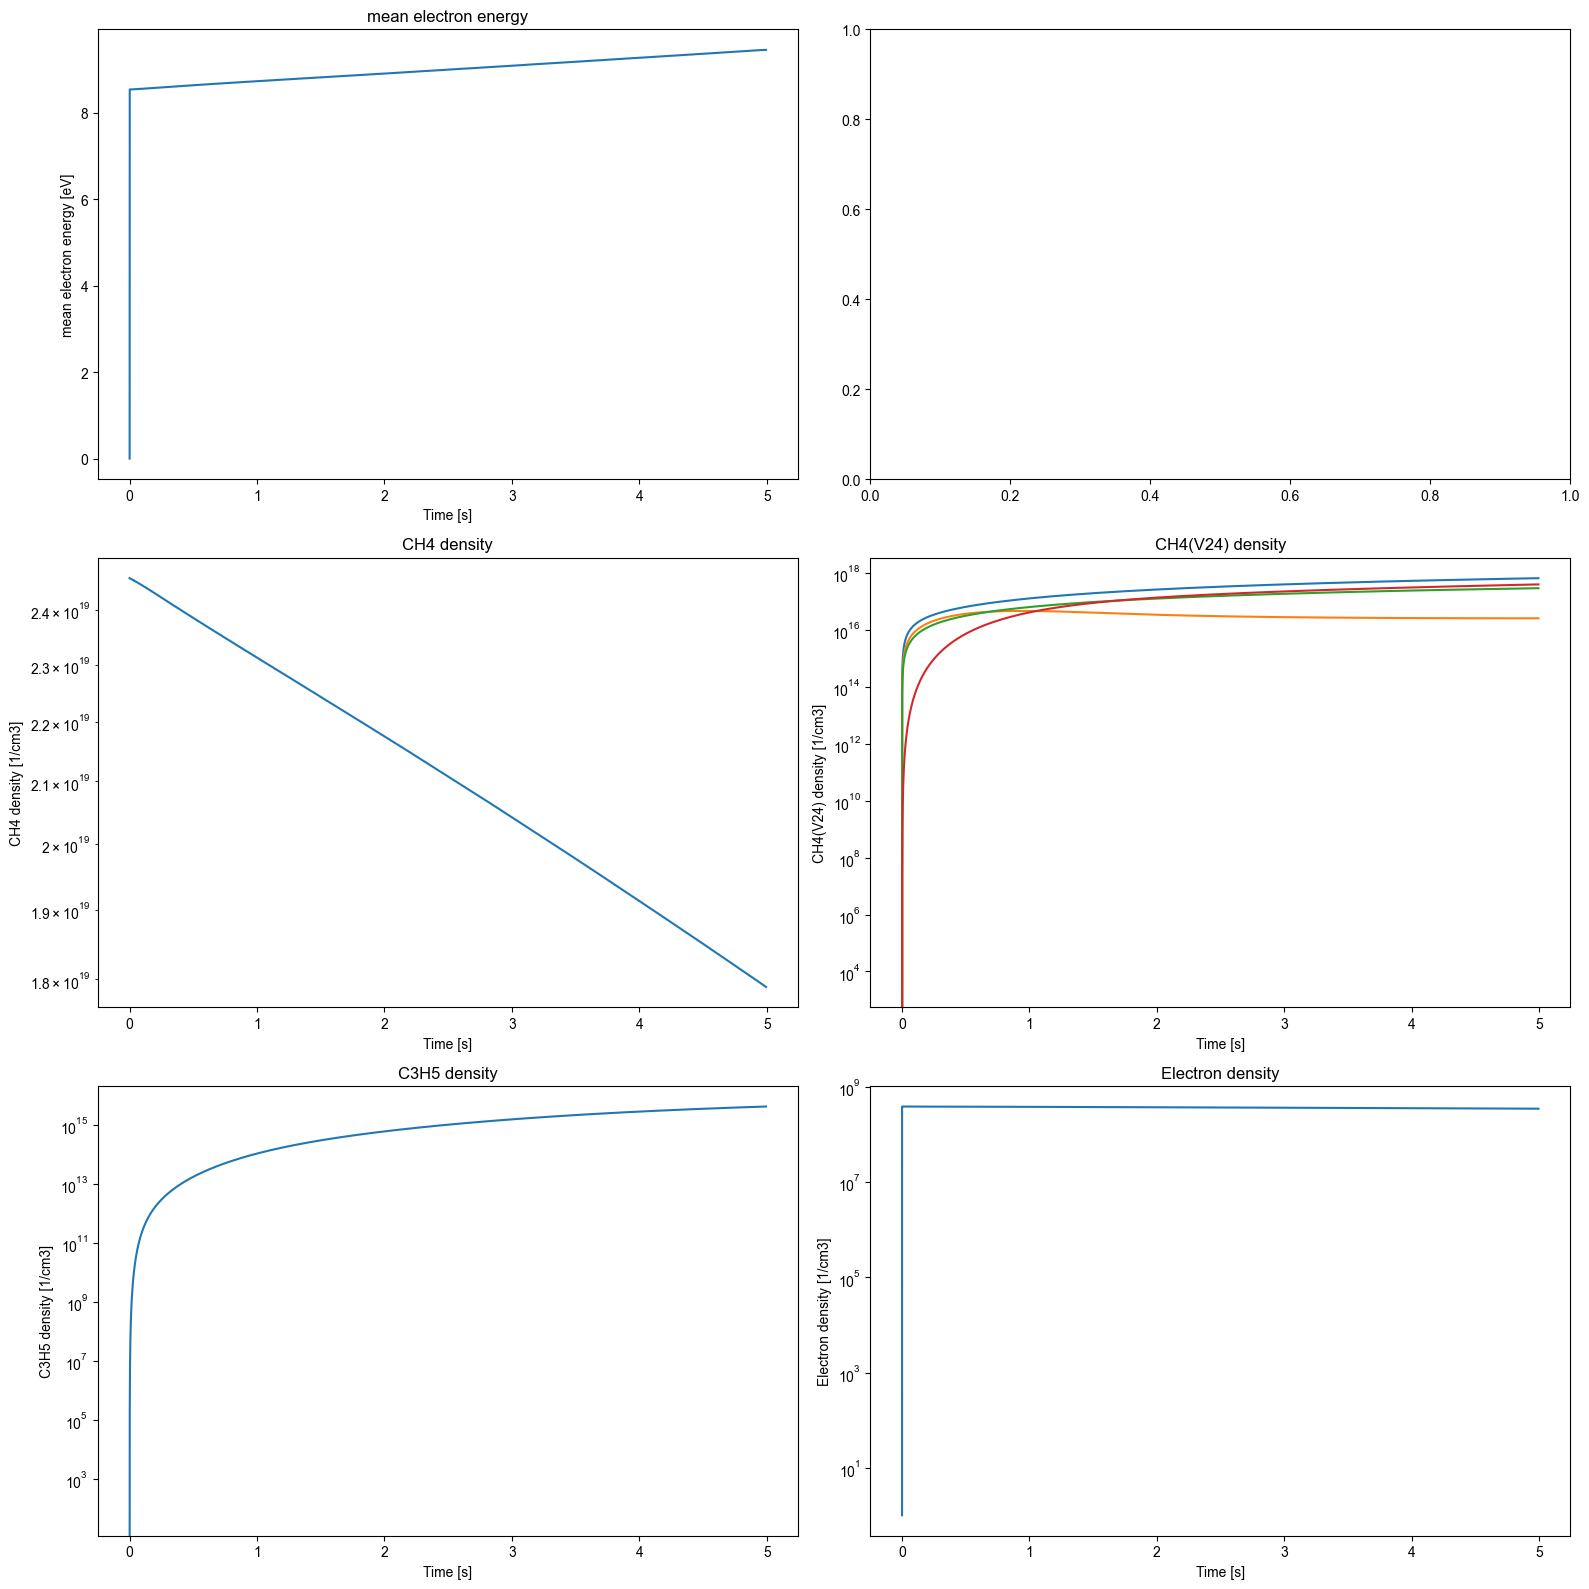

In [13]:
fig, axs = plt.subplots(3,2,figsize=(16,16))

axs[0,0].plot(df_cd['Time [s]'],3/2*df_cd['Electron temperature [K]'] / const.e * const.k)
axs[0,0].set_xlabel('Time [s]')
axs[0,0].set_ylabel('mean electron energy [eV]')
axs[0,0].set_title('mean electron energy')


axs[1,0].plot(df_sp['Time [s]'],df_sp['CH4']+df_sp['CH4(V13)']+df_sp['CH4(V24)'])
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel('Time [s]')
axs[1,0].set_ylabel('CH4 density [1/cm3]')
axs[1,0].set_title('CH4 density')

axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H6'] + df_sp['C2H6(V13)'] + df_sp['C2H6(V24)'] )
axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H4'] + df_sp['C2H4(V1)'] + df_sp['C2H4(V2)'])
axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H2'] + df_sp['C2H2(V5)'] + df_sp['C2H2(V2)'] + df_sp['C2H2(V13)'])
axs[1,1].plot(df_sp['Time [s]'],df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'])
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel('Time [s]')
axs[1,1].set_ylabel('CH4(V24) density [1/cm3]')
axs[1,1].set_title('CH4(V24) density')

axs[2,0].plot(df_sp['Time [s]'],df_sp[species[2]])
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel('Time [s]')
axs[2,0].set_ylabel(species[2]+' density [1/cm3]')
axs[2,0].set_title(species[2]+' density')

axs[2,1].plot(df_sp['Time [s]'],df_sp['E'])
axs[2,1].set_yscale('log')
axs[2,1].set_xlabel('Time [s]')
axs[2,1].set_ylabel('Electron density [1/cm3]')
axs[2,1].set_title('Electron density')

plt.tight_layout()
plt.show()

In [14]:
for i in range(len(species)):
    print(f'{species[i]}: {df_sp[species[i]].iloc[-1]}')

E: 352340000.0
H2: 4.3708e+18
C3H5: 4296300000000000.0
C2H4(V2): 685250000000000.0
CH4: 1.5304e+19
C2H3^+: 5968100.0
H^+: 6.8334e-05
C3H5^+: 52515.0
C3H6: 176170000000.0
CH2: 3494700000.0
C5H12: 0.0
C3H8: 3.4837e+17
H: 5492800000000000.0
C2H2^+: 539010.0
C2H6^+: 267840.0
C2H4(V1): 2378400000000000.0
C3H4: 9184700000000000.0
C2H: 2.4211e-10
C2H2: 2.7458e+17
C2H6: 5.9854e+17
C2H2(V5): 1.0589e+16
C3H8^+: 156080.0
C3H7: 550810000000.0
CH3: 3.0452e+18
CH4^+: 5611900.0
H3^+: 0.29105
CH2^+: 5367000.0
CH^+: 90247.0
C2H2(V13): 2257000000000000.0
C3H7^+: 96581.0
C2H2(V2): 3610500000000000.0
C2H4^+: 9049600.0
C2H6(V24): 2.8966e+16
C2H6(V13): 2.681e+16
C2H4: 2.2385e+16
CH4(V13): 1.2312e+18
C3H8(V1): 2.6473e+16
C2H5: 237780000000.0
C4H9: 1.2287e+17
C3H8(V2): 2.0558e+16
CH5^+: 297530000.0
C3H6(V): 19100000000.0
CH4(V24): 1.3597e+18
C2H5^+: 21012000.0
H2^+: 201560.0
CH: 107.03
C3H4^+: 24205.0
CH3^+: 6354100.0
C3H6^+: 15817.0
C2H3: 67909000000.0
